# Aula 2: medidas-sumário
**Objetivo da aula**: ao fim desta aula, o aluno será capaz de usar medidas-sumário (média, desvio padrão, mediana, percentis) e as figuras correspondentes (histogramas, box plot) para evidenciar características de um conjunto de dados

* Fonte dos dados: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

# Texto introdutório

É comum lermos ou ouvirmos comparações como "alguns anos atrás, o mundo era mais tranquilo", ou "as coisas estão piorando". Essas impressões são importantes, mas nem sempre correspondem a dados reais. Na verdade, entender o comportamento de fatores sócio-econômicos como o acesso à renda, à educação e à saúde é muito importante para planejamentos nacionais e internacionais relacionados à aplicação e à avaliação de políticas públicas.

Usando a base de dados do Banco Mundial, temos acesso a vários indicadores sócio-econômicos de todos os países. Como temos acesso aos dados de *todos* os países possíveis, dizemos que esses dados se referem à **população** de todos os países (importante: não se tratam dos habitantes dos países, mas sim a população de todos os elementos que fazem parte do conjunto "países"). Com esses dados, podemos visualizar e entender melhor como o mundo de hoje se compara com o mundo de anos atrás.

# Exercício 1
*Objetivo: entender dados do Banco Mundial*

Abra no Excel o [arquivo csv com dados de PIB per capita por país do Banco Mundial](dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv).

1. Quantas linhas de cabeçalho existem no arquivo?
1. Por que algumas linhas estão incompletas?

# Exercício 2
*Objetivo: abrir dados do Banco Mundial em um `dataframe` e isolar as colunas de interesse*

O trecho de código abaixo tenta abrir o arquivo com dados do Banco Mundial, mas retorna um erro.
1. Que erro é esse e por que ele está acontecendo?
1. Corrija o erro e confirme que os dados foram carregados.
1. Use o método [.loc (veja o tutorial em vídeo!)](https://youtu.be/GhvIuGXTd4g) para encontrar o PIB per capita do Brasil em 2010.

In [4]:
import pandas as pd

df = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=4)
df=df.set_index('Country Name')
df.loc['Brazil']['2010']


11286.071540212

# Exercício 3
*Objetivo: usar o `seaborn` para plotar um histograma para visualizar distribuições*

Um histograma é um tipo especial de gráfico de barras. A altura de cada barra corresponde ao número de elementos no conjunto cujo valor está em um determinado intervalo.

1. Qual é o típico PIB per capita de países em 1990?
1. O que acontece se modificarmos o valor do parâmetro "bins"?
1. Modifique o código para mostrar o histograma do PIB per capita em 2020.


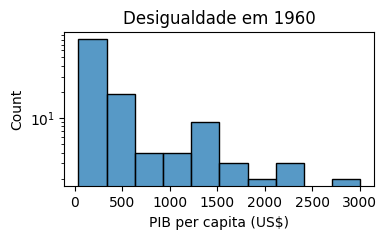

In [5]:
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

gdp = df['1960']

plt.figure(figsize=(4,2))
sns.histplot(data=gdp, bins=10)
plt.xlabel('PIB per capita (US$)')
plt.semilogy()
plt.title('Desigualdade em 1960')
plt.show()

# Exercício 4
*Objetivo: desenhar histogramas com diversos conjuntos de dados para evidenciar diferenças entre eles*

Uma vantagem de usar figuras é que elas permitem visualizar diferenças entre dados. Para evidenciar diferenças, é importante colocar lado a lado os elementos que queremos diferenciar.

1. No histograma gerado pelo código abaixo, o que podemos dizer sobre o que aconteceu com o PIB per capita no mundo entre 1960 e 1970?
1. Que tipo de construção é usada para selecionar várias colunas de um `dataframe`?
1. Modifique o trecho de código e verifique o que aconteceu com o PIB per capita no mundo década a década.
1. Até quantas cores você consegue colocar no gráfico e ainda visualizar os resultados tranquilamente?


In [1]:
gdp = df[['1960','1970']]

plt.figure()
sns.histplot(data=gdp, bins=15, multiple="dodge", shrink=0.8)
plt.xlabel('PIB per capita (US$)')
plt.semilogy()
plt.show()

NameError: name 'df' is not defined

# Exercício 5
*Objetivo: calcular a média de um conjunto de dados para evidenciar como o conjunto se comporta*

A média é o valor que obtemos quando somamos todos os valores de um conjunto de dados e dividimos pelo número de elementos desse conjunto. Por exemplo, a média de ${1, 2, 3, 4}$ é $ (1+2+3+4) / 4 = 10/4 = 2.5$.

O trecho de código abaixo mostra como calcular a média de uma coluna de um `dataframe`.

Faça uma figura mostrando como a média do PIB per capita de todos os países do mundo se comportou desde 1960 até 2020.

In [7]:
gdp_medio = df['1960'].mean()
print(gdp_medio)

482.72531432586766


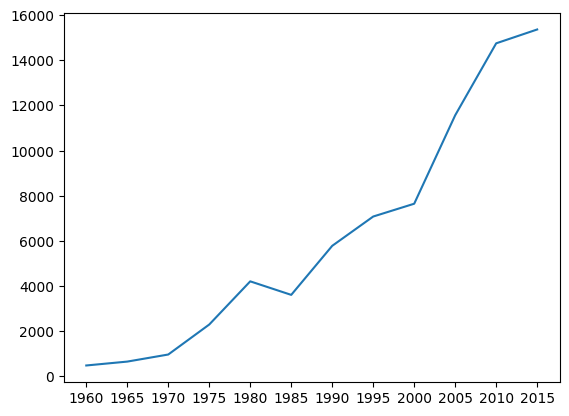

In [8]:
anos=[str(s) for s in range(1960,2020,5)]
media_pib=df[anos].mean()

plt.figure()
plt.plot(anos,media_pib)
plt.show()

# Exercício 6
*Objetivo: calcular a mediana de um conjunto de dados para evidenciar como o conjunto se comporta*

A mediana é um outro valor que indica a centralidade de um conjunto de dados. Ela é calculada da seguinte forma: os valores do conjunto são ordenados do menor para o maior, e a mediana é o valor correspondente ao elemento central dessa lista.

1. Qual é a mediana do conjunto: ${4, 2, 5, 3, 1}$?
1. No conjunto acima, se trocarmos o elemento $5$ por $50$, quem seria mais afetado: a média ou a mediana?
1. Qual medida (média ou mediana) se refere à expressão "países, em média"? E qual se liga a "o país médio"?
1. O trecho de código abaixo mostra como calcular a mediana de uma coluna de um `dataframe`. Crie um plot que mostra a mediana do PIB per capita de países ao longo dos anos entre 1960 e 2020.

In [9]:
gdp_mediano = df['1960'].median()
print(gdp_mediano)

197.897848206733


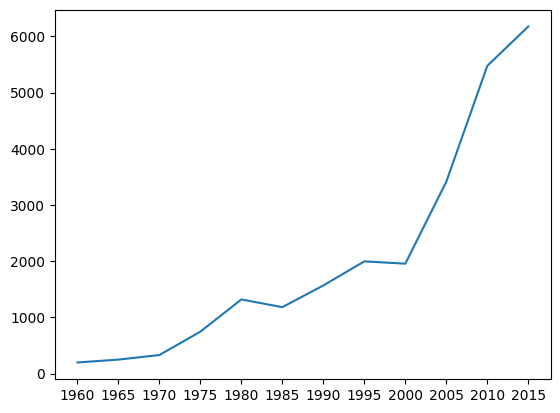

In [10]:
mediana_pib=df[anos].median()

plt.figure()
plt.plot(anos,mediana_pib)
plt.show()



# Exercício 7
*Objetivo: calcular o desvio padrão de um conjunto de dados para entender sua dispersão*

O desvio padrão é uma medida de dispersão, isto é, valores maiores do desvio padrão significam que as medidas estão mais "espalhadas". Ele é calculado como a média do quadrado da diferença em relação à média, ou:

$$
\mu = \frac{\sum_{n=1}^{N} x_n}{N}\\
\\
\\
\sigma = \sqrt{\frac{\sum_{n=1}^{N} (x_n-\mu)^2}{N}}
$$

O desvio padrão significa a diferença esperada entre um elemento qualquer e a média da população. Isso significa que, por exemplo, que se a média de notas de uma população de alunos for 8 e o desvio padrão for 2, então uma pessoa que tirou 7 está a meio desvio padrão da média, o que está dentro do desvio tipicamente esperado. Porém, se o desvio padrão for 0.5, então essa pessoa que tirou 7 está dois desvios padrões longe da média, o que significa uma diferença bem mais atípica.

O código abaixo permite calcular o desvio padrão de uma coluna de um `dataframe`.
1. Faça uma figura mostrando como o desvio padrão do PIB per capita se comporta ao longo do tempo.
1. Faça uma figura mostrando como a razão entre o desvio padrão e a média do PIB per capita se comporta ao longo do tempo.

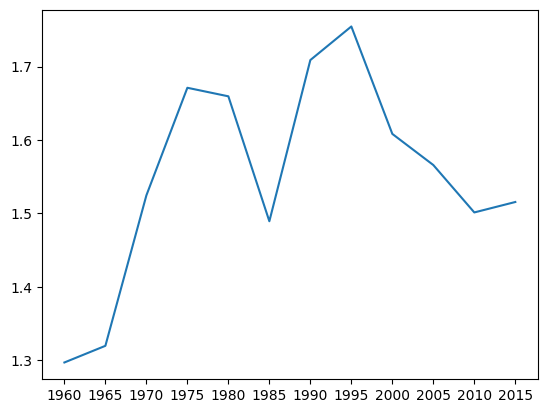

In [11]:
desvio_pib=(df[anos].std())/(df[anos].mean())

plt.figure()
plt.plot(anos,desvio_pib)
plt.show()


# Exercício 8
*Objetivo: calcular percentis para evidenciar a dispersão em medidas*

Uma outra medida de dispersão é o percentil. O *x-percentil*, ou *percentil x*, é o valor abaixo do qual está $x\%$ de seu conjunto. O raciocínio é semelhante ao da mediana. Na verdade, o *percentil 50* é exatamente a mediana.

Um *quantil* é exatamente o mesmo, exceto que ao invés de medir quantidades em porcentagens elas são medidas em frações, isto é, a mediana é o quantil $0.5$.

O código abaixo permite calcular um quantil de uma coluna. 

Existe uma frase muito comumente falada, que é:

*Apesar do progresso mundial, os países pobres se tornaram ainda mais pobres nos anos mais recentes*

Em contraposição a ela, outras pessoas respondem:

*Os países pobres estão muito menos pobres do que já estiveram! O mundo está evoluindo para todos!*

1. Faça uma figura que permita comparar a evolução do PIB per capita nos 3% países mais pobres com a evolução nos 3% mais ricos. Dica: como estamos falando de variações de grandezas, pode ser útil usar o eixo y em escala logaritmica com `plt.semilogy()`.

1. Pela sua figura, como você analisaria as duas frases colocadas acima?

In [19]:
gdp_qnt = df['1960'].quantile(q=0.50)
print(gdp_qnt)

197.897848206733


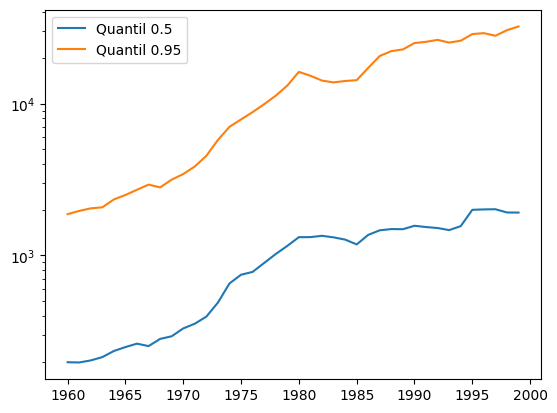

In [13]:
ano = range(1960,2000)
gdp_pob = []
gdp_ric = []

for a in ano:
    gdp_pob.append(df[str(a)].quantile(q=0.5))
    gdp_ric.append(df[str(a)].quantile(q=0.95))

plt.figure()
plt.plot(ano, gdp_pob, label='Quantil 0.5')
plt.plot(ano, gdp_ric, label='Quantil 0.95')
plt.semilogy()
plt.legend()
plt.show()

# Exercício 9
*Objetivo: plotar e interpretar boxplots*

Um boxplot é um tipo de figura muito comum em estatística que mostra a dispersão de um conjunto de dados. Tipicamente, ele marca a mediana e os quantis $0.25$ e $0.75$.

A diferença entre os quantis $0.75$ e $0.25$ é chamada de Inter-Quartile Range (IQR). Elementos cuja distância a um quartil é maior que $1.5 \times \text{IQR}$ são considerados outliers.

O código abaixo mostra como fazer um boxplot dos dados de PIB per capita. Modifique o código para mostrar o que está acontecendo com o PIB per capita dos países a cada década desde 1960.

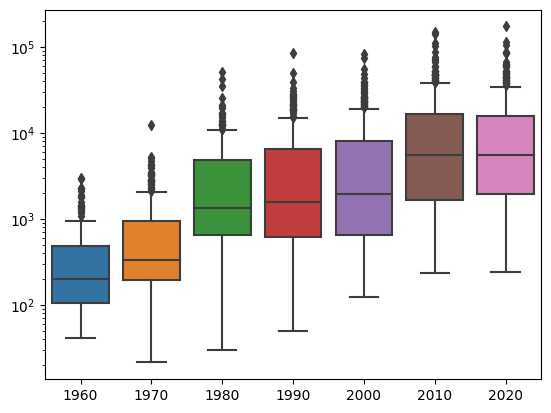

In [14]:
plt.figure()
anos=[str(s) for s in range(1960,2021,10)]
sns.boxplot(data=df[anos])
plt.semilogy()
plt.show()


# Exercício 10
*Objetivo: encontrar países em ascenção*

É possível calcular valores à partir de colunas de um dataframe - veja este [tutorial em vídeo](https://youtu.be/chAinSeQn50).

Um indicador de sucesso de um país é o crescimento relativo de seu pib. Para calcular o crescimento relativo do PIB entre 2000 e 2010, por exemplo, podemos usar a fórmula:

$$
\Delta \text{PIB} = \frac{\text{PIB}_{2010}-\text{PIB}_{2000}}{\text{PIB}_{2000}}
$$

Usando essas informações, responda: dos países ativos do Mercosul (Argentina, Brasil, Paraguai e Uruguai), qual teve o maior crescimento relativo entre os anos de 1991 (data de criação do Mercosul) até 2020?

In [15]:
df = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=4)
df=df.set_index('Country Name')
df_paises=df.loc[['Brazil','Argentina','Paraguay','Uruguay']]
pib20=df_paises['2020']
pib91=df_paises['1991']
(pib20-pib91)/pib91

Country Name
Brazil       2.008465
Argentina    0.495812
Paraguay     2.103558
Uruguay      3.314469
dtype: float64

# Exercício 11
*Objetivo: aplicar as medidas-sumário para analisar dados de indicadores do World Bank e evidenciar alguma informação importante em relação ao mundo*

O Banco Mundial disponibiliza um conjunto grande de indicadores relacionados a países. Muitos deles permitem posicionar-se, com base em dados, frente a temas como desnutrição, equidade de gênero, educação, poluição, etc. Em especial, com as técnicas que aprendemos nesta aula, podemos entender como os dados se comportam ao longo do tempo para os diversos países do mundo.

1. Navegue pela [base de dados do Banco Mundial](https://data.worldbank.org/indicator). Escolha um indicador para responder à pergunta: "o número de pessoas com acesso a instalações de saneamento básico tem diminuído".
2. Baixe os dados e certifique-se de que eles estão completos o suficiente para responder à sua pergunta.
3. Usando as técnicas que aprendemos hoje, faça uma figura que evidencie a resposta à sua pergunta.
4. Não esqueça de rotular eixos e colocar título na figura! No título, tanto a pergunta quanto a resposta devem ficar evidentes.